In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# Load dataset
iris_data = pd.read_csv('IRIS.csv')

In [15]:
iris_data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [16]:
X = iris_data.drop(columns=['species'], axis=1)

In [ ]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


### STANDARDIZATION

In [20]:
# Standard scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(X)

### PCA FOR VISUALIZATION

In [21]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(iris_scaled)

Text(0.5, 1.0, 'Unlabeled Iris Data (PCA Projection)')

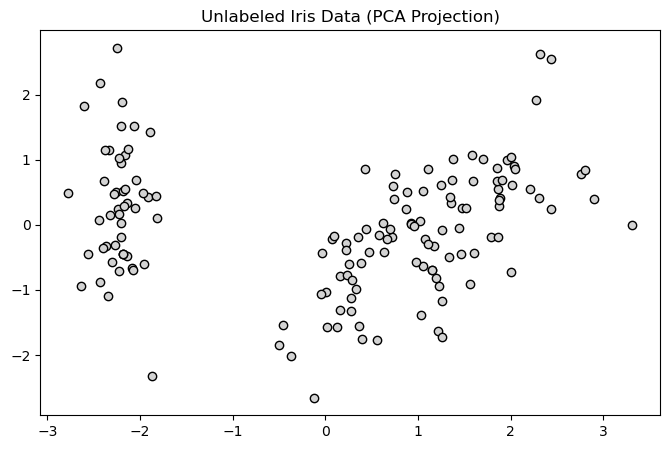

In [22]:
plt.figure(figsize=(8, 5))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c='lightgrey', edgecolors='k')
plt.title("Unlabeled Iris Data (PCA Projection)")

# Phase 2: Finding the Optimal k

#### Using silhouette method

In [23]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [25]:
inertia = []
silhouette_avg = []
k_range = range(2, 11)

In [26]:
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(iris_scaled)
    inertia.append(kmeans.inertia_)
    silhouette_avg.append(silhouette_score(iris_scaled, labels))

c:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows wi

Text(0.5, 1.0, 'Elbow Method vs Silhouette Score')

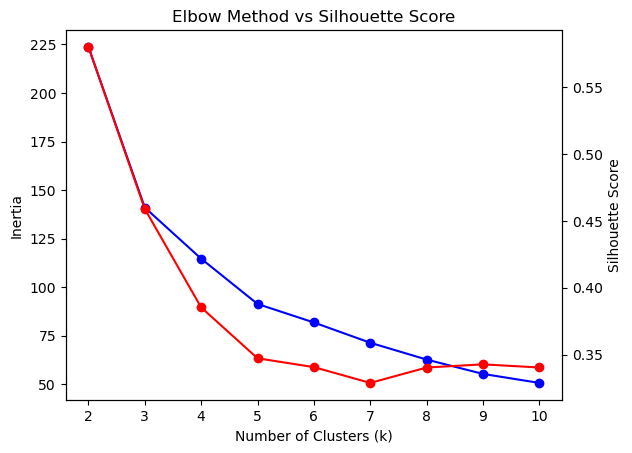

In [28]:
# Plotting the Elbow and Silhouette
fig, ax1 = plt.subplots()

ax1.plot(k_range, inertia, 'bo-', label='Inertia (Elbow)')
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Inertia')

ax2 = ax1.twinx()
ax2.plot(k_range, silhouette_avg, 'ro-', label='Silhouette Score')
ax2.set_ylabel('Silhouette Score')
plt.title("Elbow Method vs Silhouette Score")

#### Observation: The Elbow is at k=3, the silhoutte score is also quite high at k=3


## Phase 3: Final Model & Interpretation

In [30]:
final_kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = final_kmeans.fit_predict(iris_scaled)

c:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [35]:
# Add labels back to original dataframe for profiling
final_iris_data = pd.DataFrame(X, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
final_iris_data['Cluster'] = cluster_labels

In [36]:
# Profile the clusters
cluster_profile = final_iris_data.groupby('Cluster').mean()
print(cluster_profile)

         sepal_length  sepal_width  petal_length  petal_width
Cluster                                                      
0            6.314583     2.895833      4.973958     1.703125
1            5.178125     3.631250      1.496875     0.278125
2            4.754545     2.904545      1.745455     0.336364


In [37]:
final_iris_data

,sepal_length,sepal_width,petal_length,petal_width,Cluster
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,2
2,4.7,3.2,1.3,0.2,2
3,4.6,3.1,1.5,0.2,2
4,5.0,3.6,1.4,0.2,1
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0
146,6.3,2.5,5.0,1.9,0
147,6.5,3.0,5.2,2.0,0
148,6.2,3.4,5.4,2.3,0


Cluster 0: High petal length/width (The "Big" flowers).

Cluster 1: Low petal length/width (The "Small" flowers).

Cluster 2: Everything in between. (The "Medium" flowes)

In [39]:
# Creating a mapping based on my groupby results
cluster_map = {
    0: 'Large (Virginica)',
    1: 'Small (Setosa)',
    2: 'Medium (Versicolor)'
}

In [40]:
# Adding a new column with these descriptive names
final_iris_data['Flower_Identity'] = final_iris_data['Cluster'].map(cluster_map)

In [41]:
final_iris_data

,sepal_length,sepal_width,petal_length,petal_width,Cluster,Flower_Identity
0,5.1,3.5,1.4,0.2,1,Small (Setosa)
1,4.9,3.0,1.4,0.2,2,Medium (Versicolor)
2,4.7,3.2,1.3,0.2,2,Medium (Versicolor)
3,4.6,3.1,1.5,0.2,2,Medium (Versicolor)
4,5.0,3.6,1.4,0.2,1,Small (Setosa)
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,0,Large (Virginica)
146,6.3,2.5,5.0,1.9,0,Large (Virginica)
147,6.5,3.0,5.2,2.0,0,Large (Virginica)
148,6.2,3.4,5.4,2.3,0,Large (Virginica)


### SAVING MY MODEL, SCALER AND CLUSTER MAP

In [43]:
import joblib

joblib.dump(kmeans, 'iris_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(cluster_map, 'cluster_map.pkl')

['cluster_map.pkl']